# DBSCAN clustering

Given a point cloud from e.g. a depth sensor we want to group local point cloud clusters together. For this purpose, we can use clustering algorithms. Open3D implements DBSCAN [Ester1996] that is a density based clustering algorithm. The algorithm is implemented in cluster_dbscan and requires two parameters: eps defines the distance to neighbors in a cluster and min_points defines the minimum number of points required to form a cluster. The function returns labels, where the label -1 indicates noise.

In [6]:
import open3d as o3d 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import sys
# only needed for tutorial, monkey patches visualization
sys.path.append (' ..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 63                      ] 2%
point cloud has 63 clusters
Precompute neighbors.[========================================] 100%


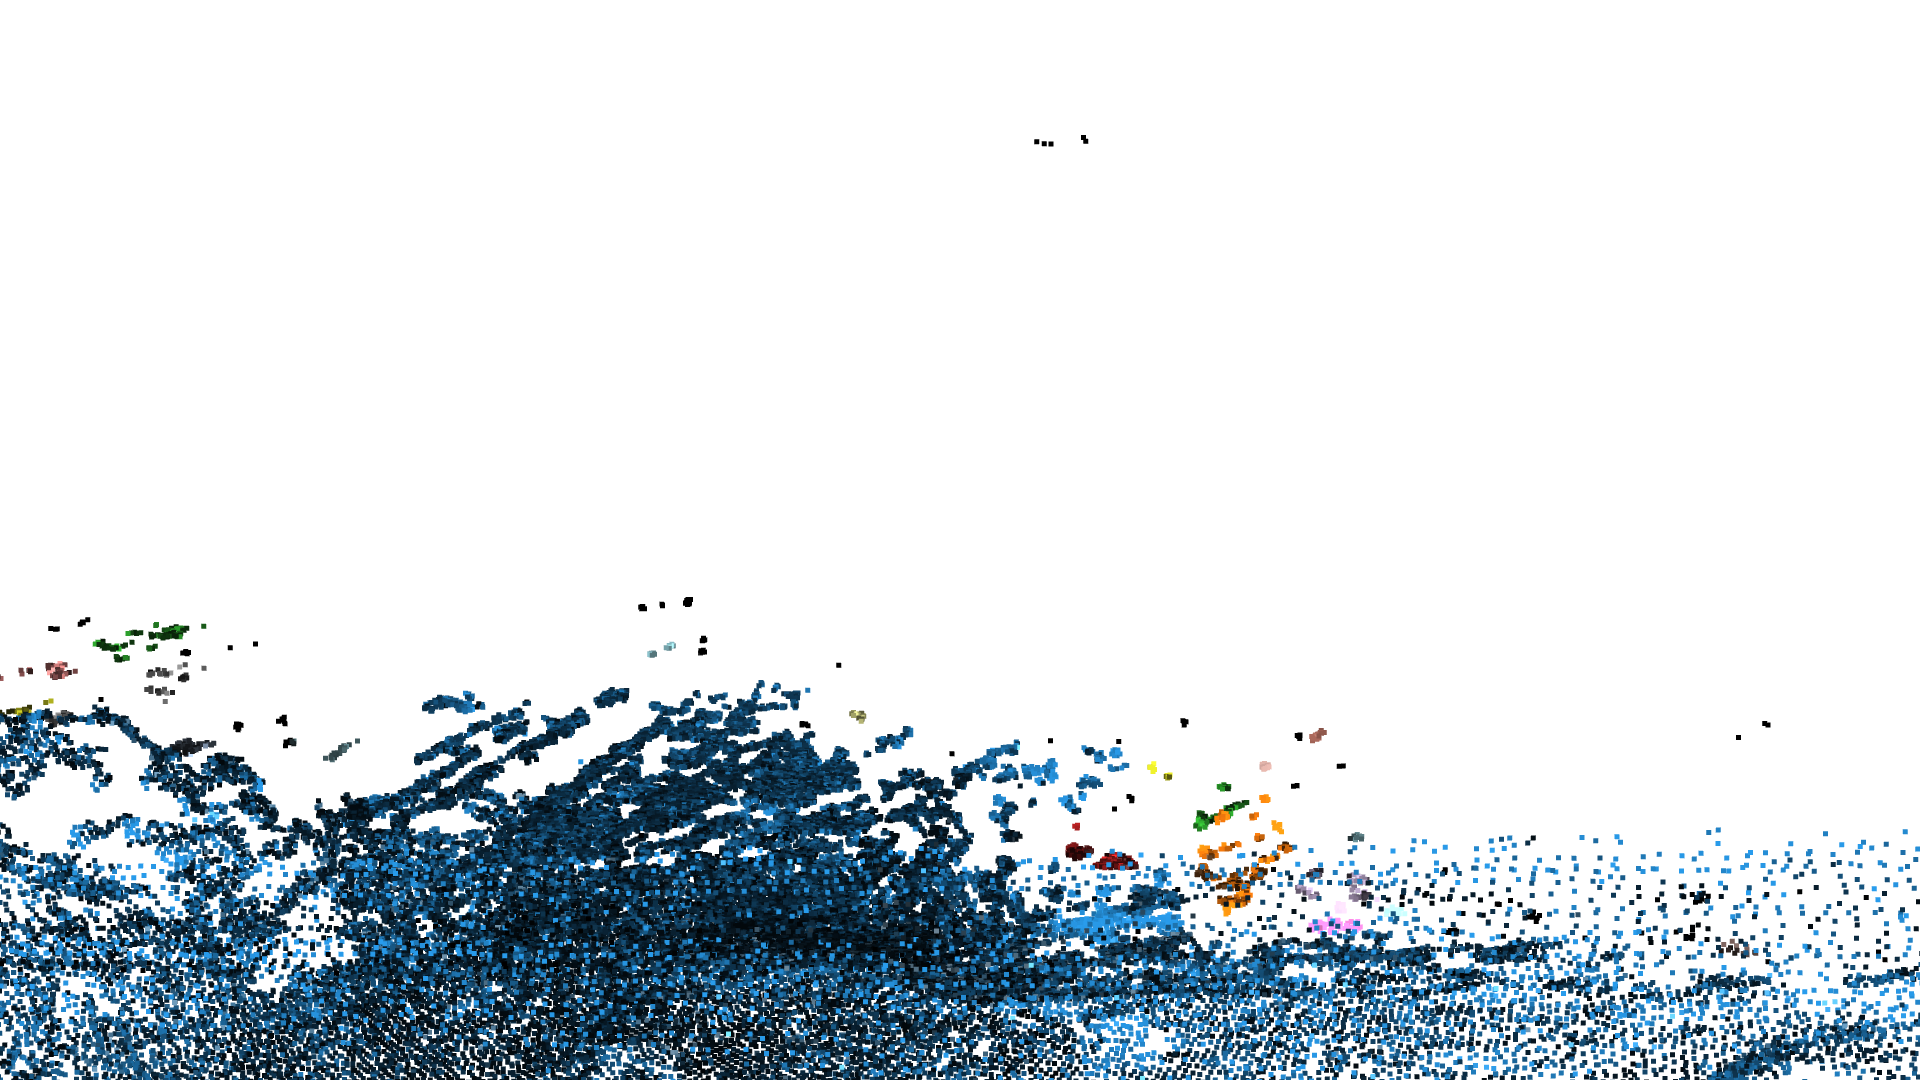

In [8]:
pcd = o3d.io.read_point_cloud("./filtered_point_cloud.ply")

with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=0.2, min_points=10, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

Note:

This algorithm precomputes all neighbors in the epsilon radius for all points. This can require a lot of memory if the chosen epsilon is too large.